In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_df = pd.read_csv("combined-QC.csv")
input_df.columns

Index(['study', 'patient', 'interview_type', 'day', 'interview_number',
       'length_minutes', 'overall_db', 'amplitude_stdev', 'mean_flatness',
       'minimum_faces_detected_in_frame', 'maximum_faces_detected_in_frame',
       'mean_faces_detected_in_frame', 'mean_face_confidence_score',
       'mean_face_area', 'num_redacted', 'num_inaudible', 'num_subjects',
       'num_turns_S1', 'num_words_S1', 'num_turns_S2', 'num_words_S2',
       'num_turns_S3', 'num_words_S3', 'final_timestamp_minutes',
       'min_timestamp_space_per_word', 'max_timestamp_space_per_word'],
      dtype='object')

In [4]:
input_df.head()

,study,patient,interview_type,day,interview_number,length_minutes,overall_db,amplitude_stdev,mean_flatness,minimum_faces_detected_in_frame,...,num_subjects,num_turns_S1,num_words_S1,num_turns_S2,num_words_S2,num_turns_S3,num_words_S3,final_timestamp_minutes,min_timestamp_space_per_word,max_timestamp_space_per_word
0,PronetLA,LA00145,open,122,1,21.79,69.36,0.059,0.0068,1.0,...,2.0,93.0,1375.0,92.0,1651.0,0.0,0.0,21.72,0.033,2.560
1,PronetLA,LA03036,open,45,1,21.68,72.04,0.080,0.0111,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PronetLA,LA03036,open,107,2,20.54,71.15,0.072,0.0160,2.0,...,3.0,107.0,761.0,108.0,2387.0,1.0,3.0,20.45,0.000,3.301
3,PronetLA,LA04513,open,14,1,19.13,70.57,0.068,0.0107,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PronetLA,LA05539,open,38,1,21.19,65.98,0.040,0.0101,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
input_df["total_words"] = input_df["num_words_S1"] + input_df["num_words_S2"] + input_df["num_words_S3"] # note if num subjects > 3 this will be off though
input_df["total_turns"] = input_df["num_turns_S1"] + input_df["num_turns_S2"] + input_df["num_turns_S3"] # note if num subjects > 3 this will be off though
input_df["inaudible_per_word"] = input_df["num_inaudible"]/input_df["total_words"]
input_df["redacted_per_word"] = input_df["num_redacted"]/input_df["total_words"]

In [156]:
from matplotlib.backends.backend_pdf import PdfPages
combined_pdf = PdfPages("all.pdf")
open_pdf = PdfPages("open.pdf")
psychs_pdf = PdfPages("psychs.pdf")

In [157]:
key_features = ["length_minutes","mean_faces_detected_in_frame","inaudible_per_word","redacted_per_word"]
n_bins = [30, 7, 6, 6]

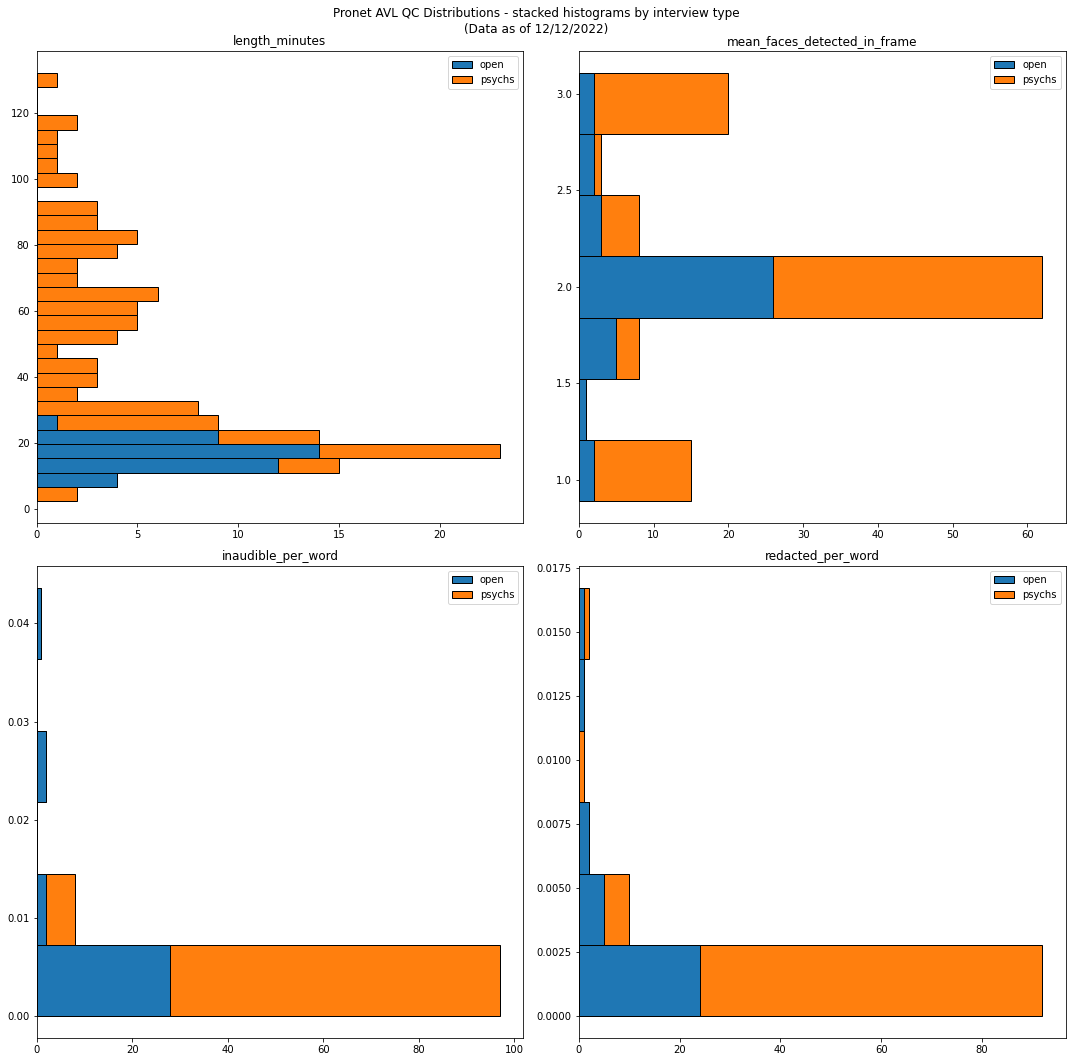

In [158]:
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [input_df[input_df["interview_type"]=="open"][key_features[i]].tolist(), input_df[input_df["interview_type"]=="psychs"][key_features[i]].tolist()]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=["open", "psychs"], edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title(key_features[i])

fig.suptitle("Pronet AVL QC Distributions - stacked histograms by interview type" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
combined_pdf.savefig()

In [159]:
open_only = input_df[input_df["interview_type"]=="open"]
psychs_only = input_df[input_df["interview_type"]=="psychs"]
site_list = list(set(input_df["study"].tolist()))
site_list.sort()
site_names = [x[-2:] for x in site_list]

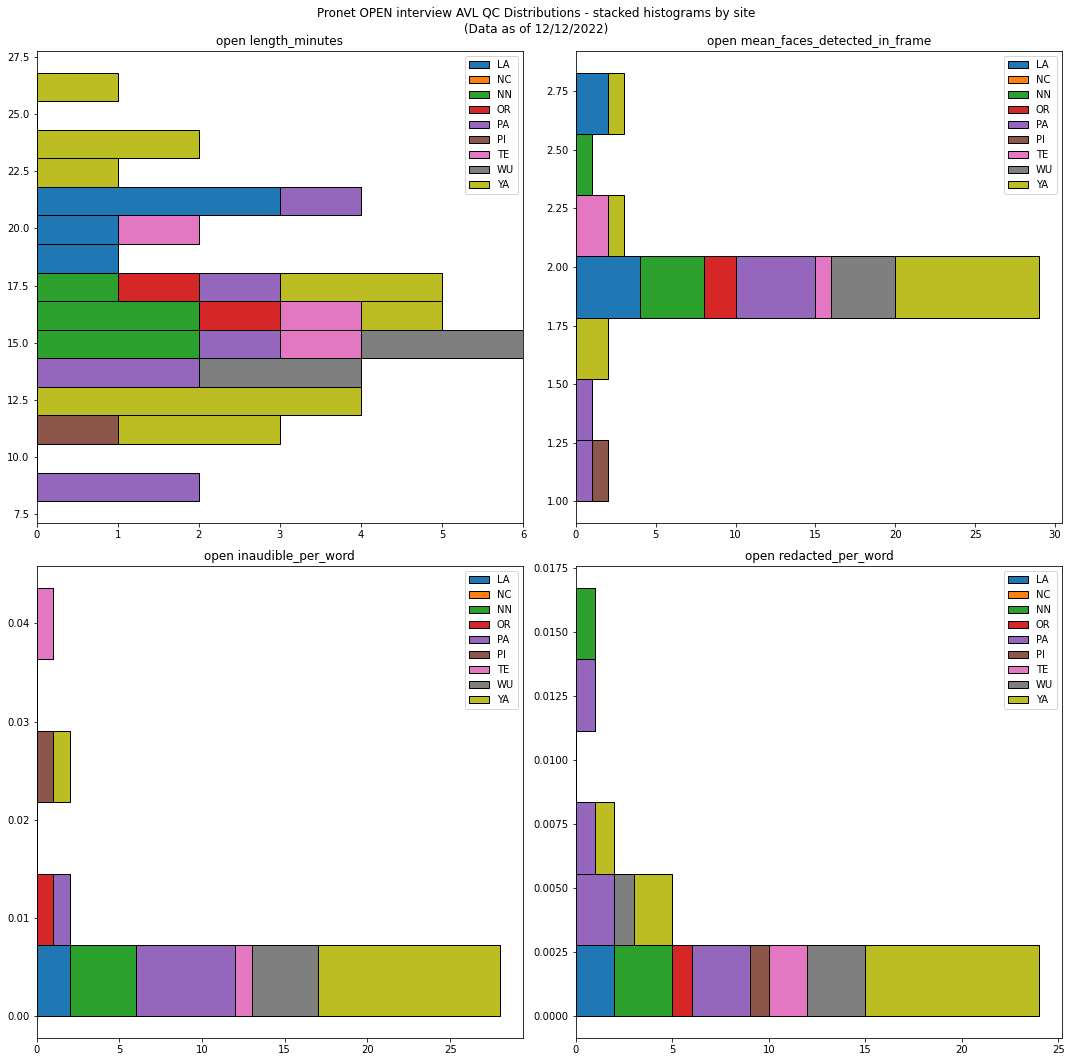

In [160]:
n_bins = [15, 7, 6, 6]
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [open_only[open_only["study"]==x][key_features[i]].tolist() for x in site_list]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=site_names, edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title("open " + key_features[i])

fig.suptitle("Pronet OPEN interview AVL QC Distributions - stacked histograms by site" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
open_pdf.savefig()

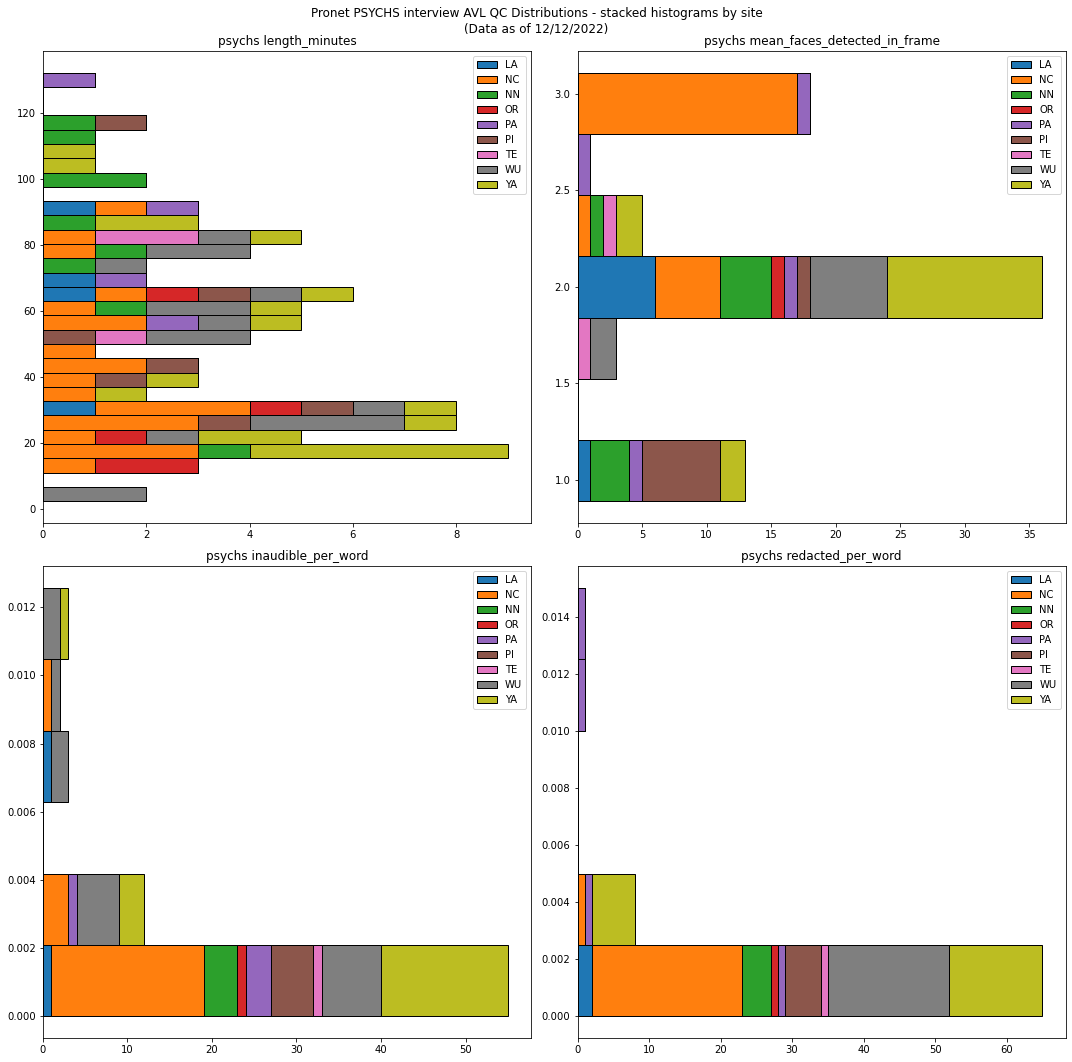

In [161]:
n_bins = [30, 7, 6, 6]
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [psychs_only[psychs_only["study"]==x][key_features[i]].tolist() for x in site_list]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=site_names, edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title("psychs " + key_features[i])

fig.suptitle("Pronet PSYCHS interview AVL QC Distributions - stacked histograms by site" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
psychs_pdf.savefig()

In [162]:
key_features = ["num_subjects","total_words","num_inaudible","num_redacted"]
n_bins = [4, 30, 20, 20]

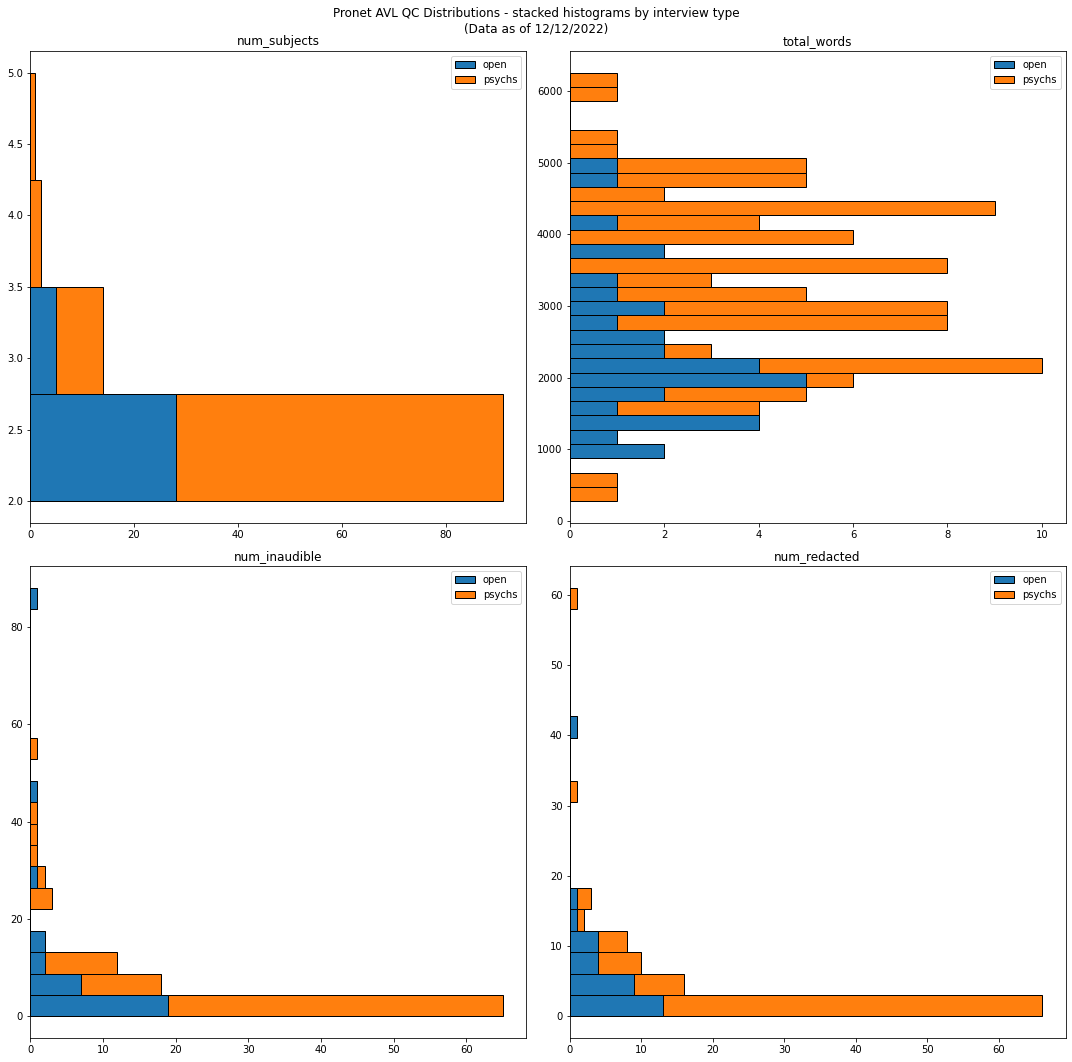

In [163]:
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [input_df[input_df["interview_type"]=="open"][key_features[i]].tolist(), input_df[input_df["interview_type"]=="psychs"][key_features[i]].tolist()]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=["open", "psychs"], edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title(key_features[i])

fig.suptitle("Pronet AVL QC Distributions - stacked histograms by interview type" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
combined_pdf.savefig()

In [164]:
open_only = input_df[input_df["interview_type"]=="open"]
psychs_only = input_df[input_df["interview_type"]=="psychs"]
site_list = list(set(input_df["study"].tolist()))
site_list.sort()
site_names = [x[-2:] for x in site_list]

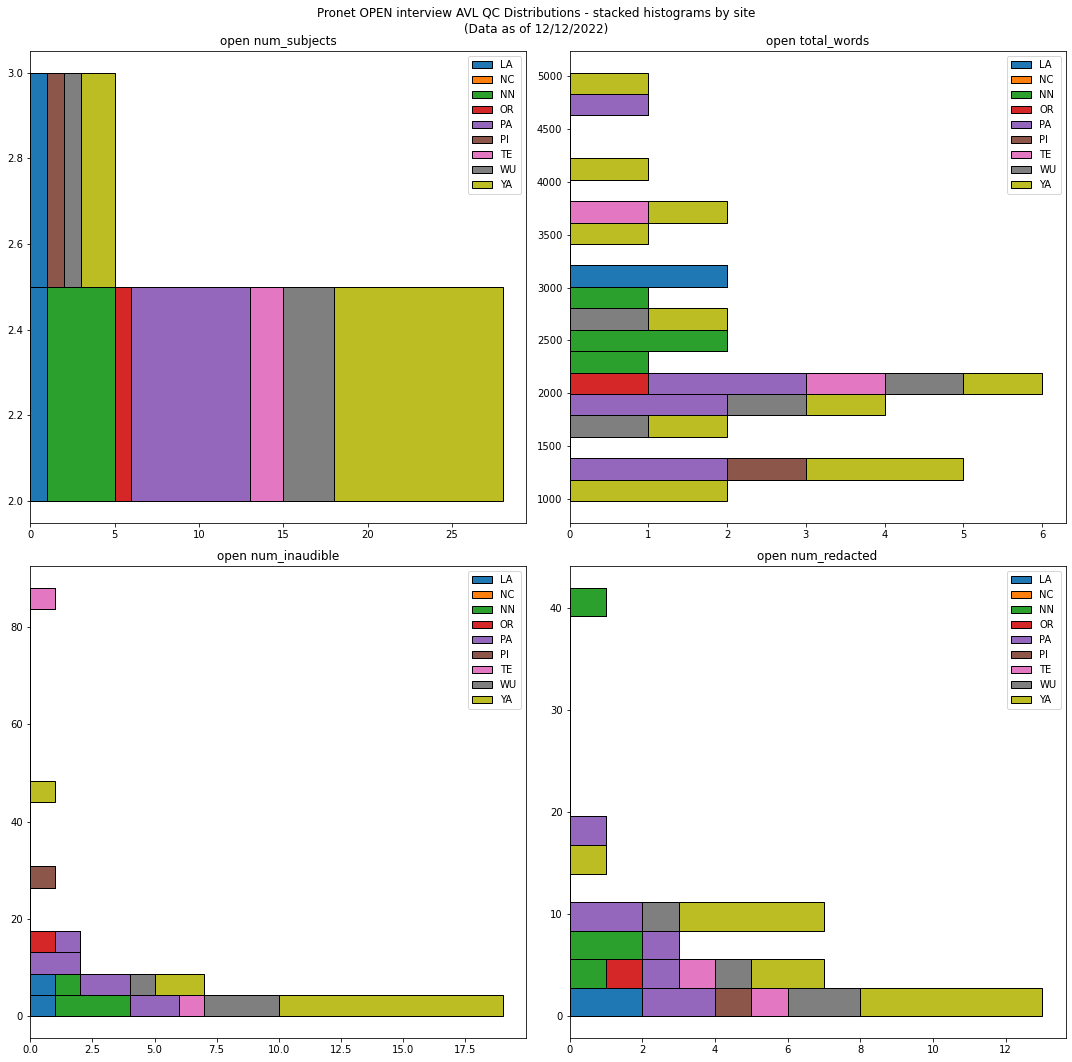

In [165]:
n_bins = [2, 20, 20, 15]
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [open_only[open_only["study"]==x][key_features[i]].tolist() for x in site_list]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=site_names, edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title("open " + key_features[i])

fig.suptitle("Pronet OPEN interview AVL QC Distributions - stacked histograms by site" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
open_pdf.savefig()

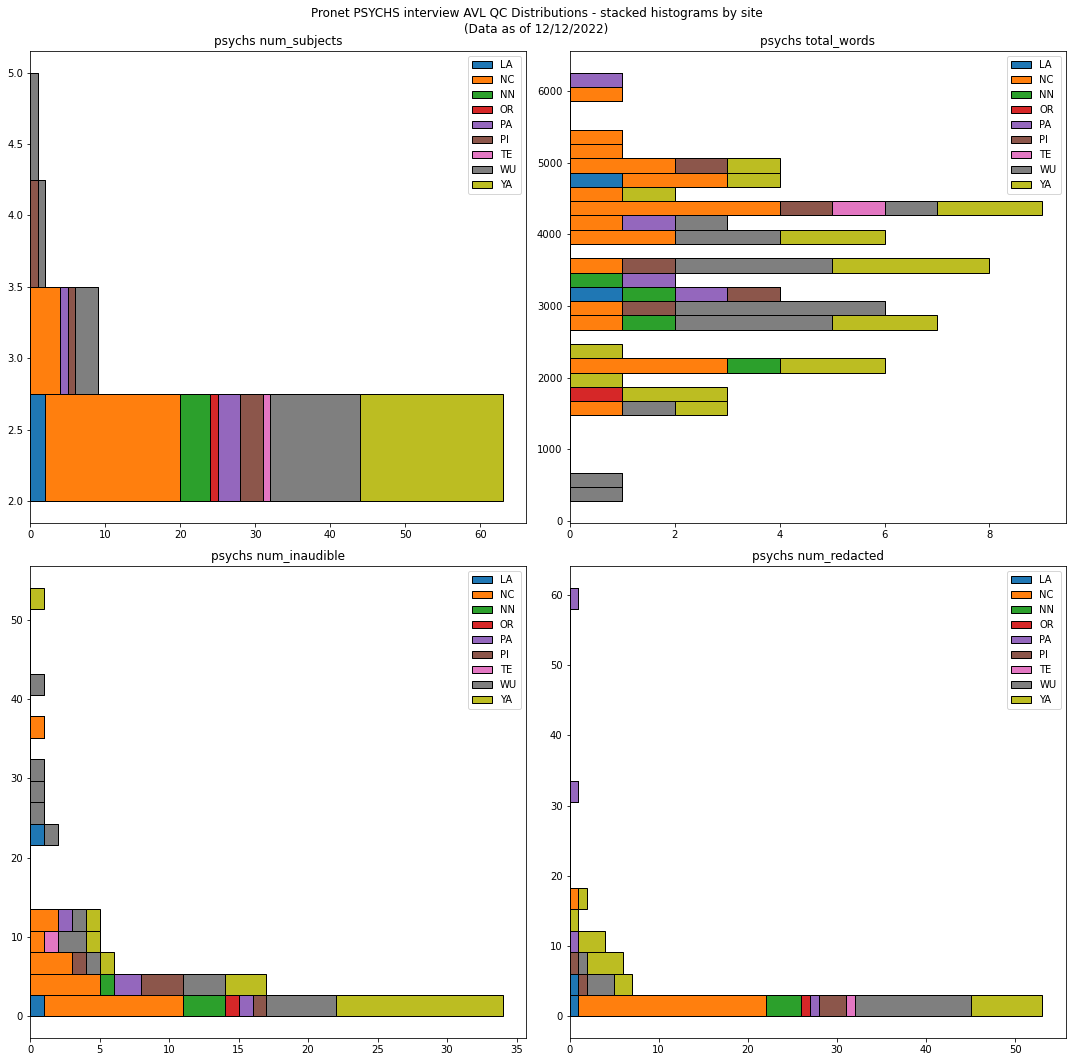

In [166]:
n_bins = [4, 30, 20, 20]
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [psychs_only[psychs_only["study"]==x][key_features[i]].tolist() for x in site_list]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=site_names, edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title("psychs " + key_features[i])

fig.suptitle("Pronet PSYCHS interview AVL QC Distributions - stacked histograms by site" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
psychs_pdf.savefig()

In [167]:
key_features = ["overall_db","mean_flatness","total_turns","mean_face_area"]
n_bins = [10, 20, 30, 30]

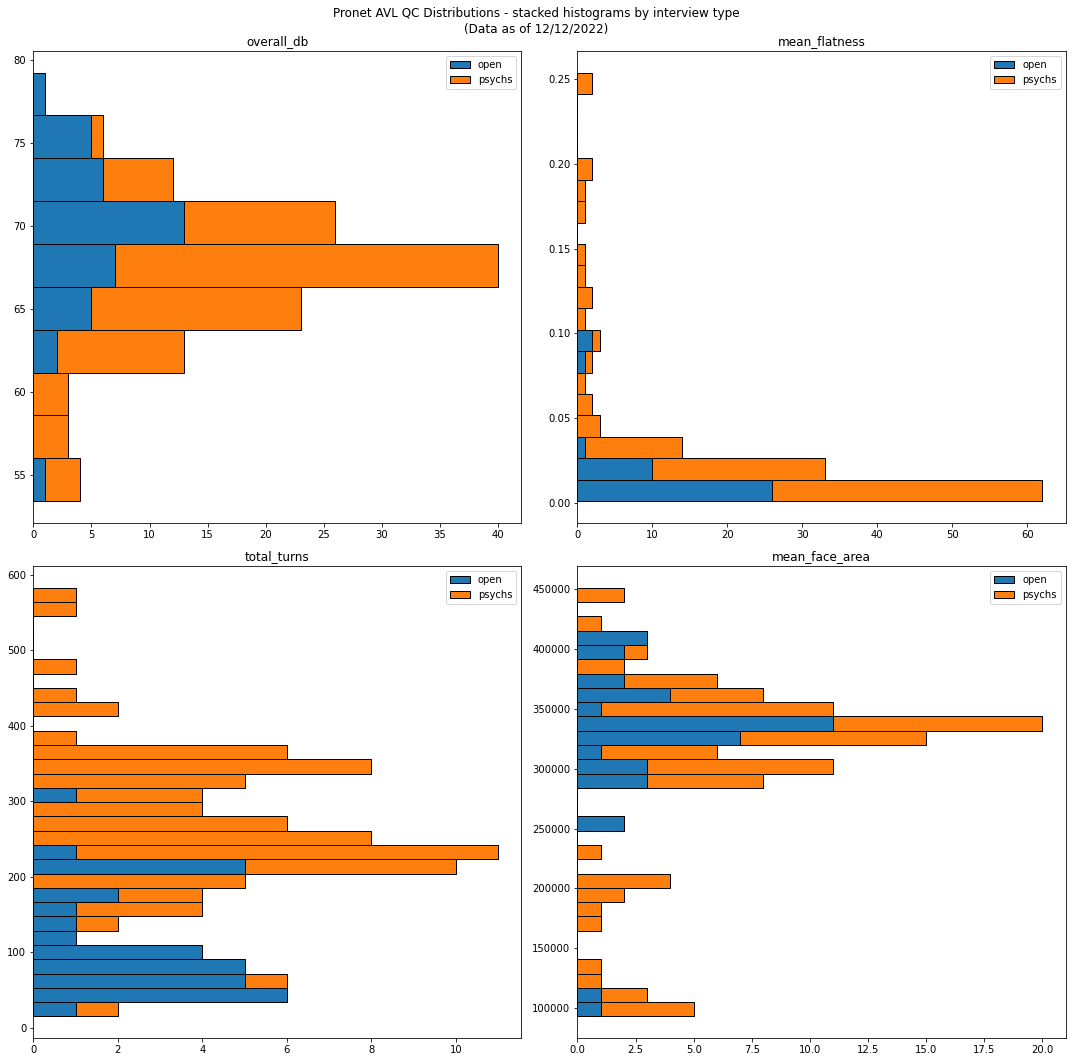

In [168]:
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [input_df[input_df["interview_type"]=="open"][key_features[i]].tolist(), input_df[input_df["interview_type"]=="psychs"][key_features[i]].tolist()]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=["open", "psychs"], edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title(key_features[i])

fig.suptitle("Pronet AVL QC Distributions - stacked histograms by interview type" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
combined_pdf.savefig()

In [169]:
open_only = input_df[input_df["interview_type"]=="open"]
psychs_only = input_df[input_df["interview_type"]=="psychs"]
site_list = list(set(input_df["study"].tolist()))
site_list.sort()
site_names = [x[-2:] for x in site_list]

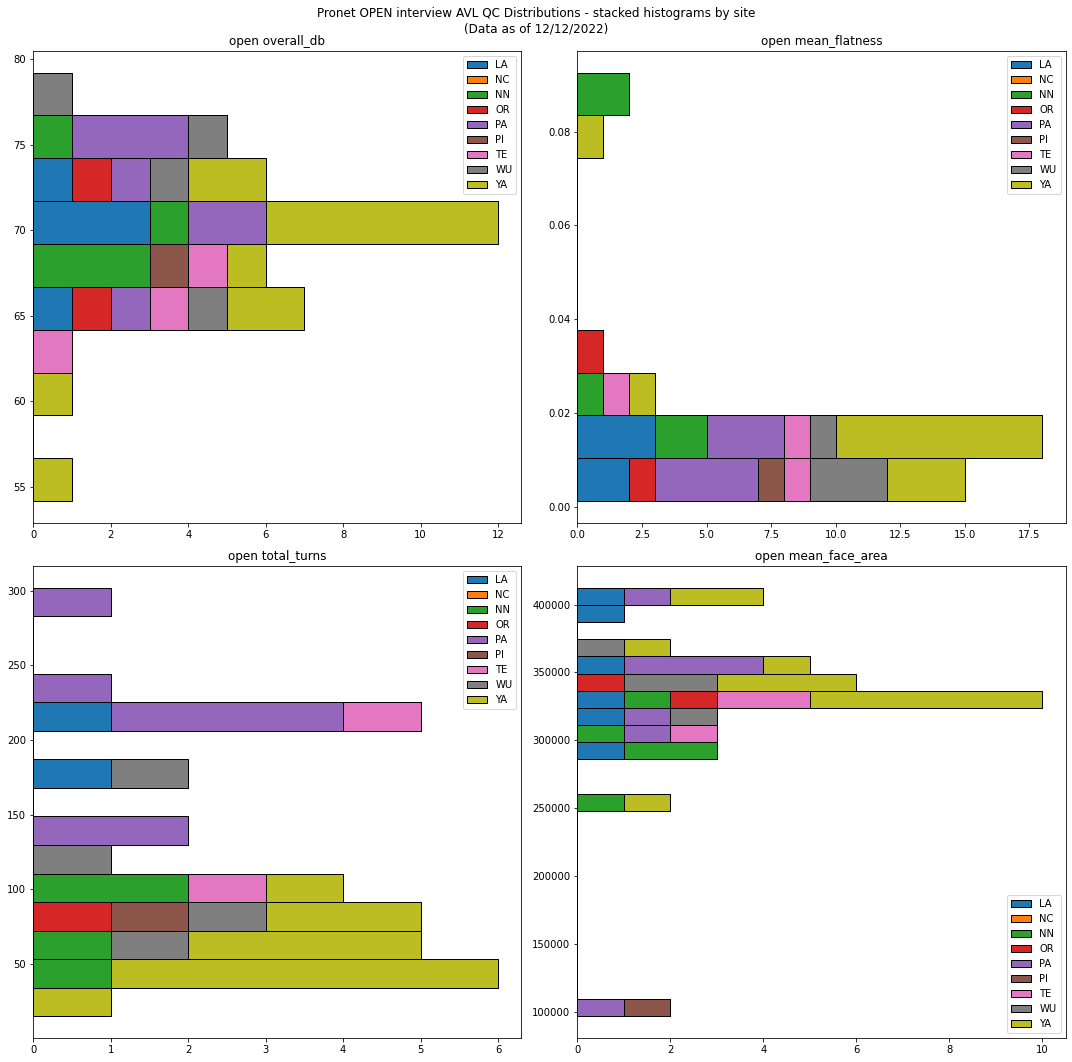

In [170]:
n_bins = [10, 10, 15, 25]
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [open_only[open_only["study"]==x][key_features[i]].tolist() for x in site_list]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=site_names, edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title("open " + key_features[i])

fig.suptitle("Pronet OPEN interview AVL QC Distributions - stacked histograms by site" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
open_pdf.savefig()

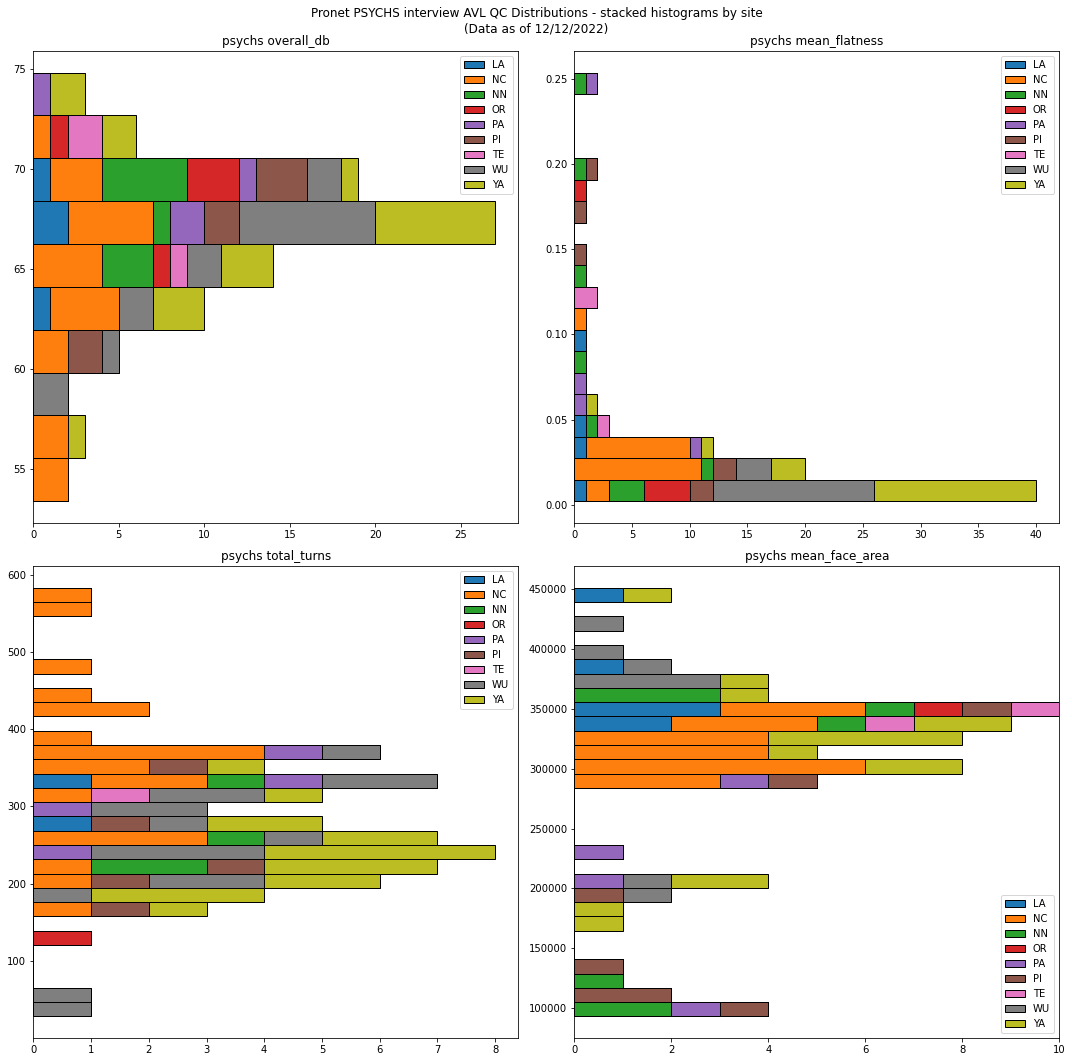

In [171]:
n_bins = [10, 20, 30, 30]
fig, axs = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
for i in range(len(key_features)):
    comb_list = [psychs_only[psychs_only["study"]==x][key_features[i]].tolist() for x in site_list]
    cur_bins = n_bins[i]
    if i < 2:
        cur_ax = axs[0][i]
    else:
        cur_ax = axs[1][i-2]
    cur_ax.hist(comb_list, cur_bins, histtype="bar", stacked=True, orientation="horizontal", label=site_names, edgecolor = "black")
    cur_ax.legend()
    cur_ax.set_title("psychs " + key_features[i])

fig.suptitle("Pronet PSYCHS interview AVL QC Distributions - stacked histograms by site" + "\n" + "(Data as of 12/12/2022)")
fig.tight_layout()
psychs_pdf.savefig()

In [60]:
aud_count = input_df[["study","interview_type","overall_db"]].dropna(how='any')
aud_count.groupby(["study","interview_type"]).count()

overall_db
study    interview_type            
PronetLA open                     5
         psychs                   4
PronetNC psychs                  23
PronetNN open                     5
         psychs                   9
PronetOR open                     2
         psychs                   5
PronetPA open                     7
         psychs                   4
PronetPI open                     1
         psychs                   7
PronetTE open                     3
         psychs                   3
PronetWU open                     4
         psychs                  17
PronetYA open                    13
         psychs                  19

In [61]:
vid_count = input_df[["study","interview_type","mean_face_area"]].dropna(how='any')
vid_count.groupby(["study","interview_type"]).count()

mean_face_area
study    interview_type                
PronetLA open                         6
         psychs                       7
PronetNC psychs                      23
PronetNN open                         5
         psychs                       8
PronetOR open                         2
         psychs                       1
PronetPA open                         7
         psychs                       4
PronetPI open                         1
         psychs                       7
PronetTE open                         3
         psychs                       2
PronetWU open                         4
         psychs                       8
PronetYA open                        13
         psychs                      16

In [63]:
trans_count = input_df[["study","interview_type","total_words"]].dropna(how='any')
trans_count.groupby(["study","interview_type"]).count()

total_words
study    interview_type             
PronetLA open                      2
         psychs                    2
PronetNC psychs                   22
PronetNN open                      4
         psychs                    4
PronetOR open                      1
         psychs                    1
PronetPA open                      7
         psychs                    4
PronetPI open                      1
         psychs                    5
PronetTE open                      2
         psychs                    1
PronetWU open                      4
         psychs                   17
PronetYA open                     12
         psychs                   19

In [64]:
aud_qc = input_df[["study","interview_type","inaudible_per_word"]].dropna(how='any')
aud_qc.groupby(["study","interview_type"]).mean()

inaudible_per_word
study    interview_type                    
PronetLA open                      0.000952
         psychs                    0.003560
PronetNC psychs                    0.001263
PronetNN open                      0.000912
         psychs                    0.000625
PronetOR open                      0.007770
         psychs                    0.000554
PronetPA open                      0.003209
         psychs                    0.001450
PronetPI open                      0.023292
         psychs                    0.001123
PronetTE open                      0.021815
         psychs                    0.002072
PronetWU open                      0.001195
         psychs                    0.004144
PronetYA open                      0.002556
         psychs                    0.001537

In [65]:
vid_qc = input_df[["study","interview_type","mean_faces_detected_in_frame"]].dropna(how='any')
vid_qc.groupby(["study","interview_type"]).mean()

mean_faces_detected_in_frame
study    interview_type                              
PronetLA open                                2.236667
         psychs                              1.860000
PronetNC psychs                              2.760435
PronetNN open                                2.100000
         psychs                              1.657500
PronetOR open                                2.000000
         psychs                              2.000000
PronetPA open                                1.785714
         psychs                              2.167500
PronetPI open                                1.000000
         psychs                              1.114286
PronetTE open                                2.140000
         psychs                              1.950000
PronetWU open                                2.000000
         psychs                              1.911250
PronetYA open                                2.012308
         psychs                              1.885625

In [66]:
trans_qc = input_df[["study","interview_type","redacted_per_word"]].dropna(how='any')
trans_qc.groupby(["study","interview_type"]).mean()

redacted_per_word
study    interview_type                   
PronetLA open                     0.000489
         psychs                   0.000625
PronetNC psychs                   0.000273
PronetNN open                     0.005859
         psychs                   0.000073
PronetOR open                     0.002285
         psychs                   0.000000
PronetPA open                     0.004649
         psychs                   0.007302
PronetPI open                     0.000000
         psychs                   0.000679
PronetTE open                     0.001371
         psychs                   0.000230
PronetWU open                     0.001683
         psychs                   0.000446
PronetYA open                     0.002389
         psychs                   0.001974

In [69]:
no_redact_count = input_df[input_df["num_redacted"]==0][["study", "interview_type", "num_redacted"]]
no_redact_count.groupby(["study","interview_type"]).count()

num_redacted
study    interview_type              
PronetLA psychs                     1
PronetNC psychs                    11
PronetNN psychs                     3
PronetOR psychs                     1
PronetPA open                       1
PronetPI open                       1
         psychs                     2
PronetWU open                       1
         psychs                    11
PronetYA open                       1
         psychs                     1

In [76]:
ag = aud_count.groupby(["study","interview_type"]).count()
vg = vid_count.groupby(["study","interview_type"]).count()
tg = trans_count.groupby(["study","interview_type"]).count()

In [78]:
all_counts = ag.merge(vg, how="outer", left_index=True, right_index=True).merge(tg, how="outer", left_index=True, right_index=True)
all_counts.rename(columns={"overall_db":"processed_audio_count","mean_face_area":"processed_video_count","total_words":"processed_transcript_count"})

processed_audio_count  processed_video_count  \
study    interview_type                                                 
PronetLA open                                5                      6   
         psychs                              4                      7   
PronetNC psychs                             23                     23   
PronetNN open                                5                      5   
         psychs                              9                      8   
PronetOR open                                2                      2   
         psychs                              5                      1   
PronetPA open                                7                      7   
         psychs                              4                      4   
PronetPI open                                1                      1   
         psychs                              7                      7   
PronetTE open                                3                      3   
         psychs                              3                      2   
PronetWU open                                4                      4   
         psychs                             17                      8   
PronetYA open                               13                     13   
         psychs                             19                     16   

                         processed_transcript_count  
study    interview_type                              
PronetLA open                                     2  
         psychs                                   2  
PronetNC psychs                                  22  
PronetNN open                                     4  
         psychs                                   4  
PronetOR open                                     1  
         psychs                                   1  
PronetPA open                                     7  
         psychs                                   4  
PronetPI open                                     1  
         psychs                                   5  
PronetTE open                                     2  
         psychs                                   1  
PronetWU open                                     4  
         psychs                                  17  
PronetYA open                                    12  
         psychs                                  19

In [90]:
final_table_counts = input_df[["study","interview_type","overall_db","mean_face_area","total_words"]].groupby([pd.Categorical(input_df.study),"interview_type"]).count().fillna(0).astype(int)
final_table_counts.rename(columns={"overall_db":"processed_audio_count","mean_face_area":"processed_video_count","total_words":"processed_transcript_count"},inplace=True)

In [92]:
redact_filt = input_df[input_df["num_redacted"]==0]
no_redact_count = redact_filt[["study", "interview_type", "num_redacted"]].groupby([pd.Categorical(redact_filt.study),"interview_type"]).count().rename(columns={"num_redacted":"zero_redaction_count"})

In [95]:
inaud_filt = input_df[input_df["inaudible_per_word"]>0.001]
bad_qual_count = inaud_filt[["study", "interview_type", "inaudible_per_word"]].groupby([pd.Categorical(inaud_filt.study),"interview_type"]).count().rename(columns={"inaudible_per_word":"word_inaudible_rate_gt_0.001"})

In [97]:
faces_filt = input_df[input_df["mean_faces_detected_in_frame"]<1.8]
bad_face_count = faces_filt[["study", "interview_type", "mean_faces_detected_in_frame"]].groupby([pd.Categorical(faces_filt.study),"interview_type"]).count().rename(columns={"mean_faces_detected_in_frame":"average_face_count_lt_1.8"})

In [98]:
all_counts = final_table_counts.merge(no_redact_count, how="outer", left_index=True, right_index=True).merge(bad_qual_count, how="outer", left_index=True, right_index=True).merge(bad_face_count, how="outer", left_index=True, right_index=True)

In [100]:
formatted_table = all_counts[["processed_video_count", "average_face_count_lt_1.8", "processed_audio_count", "processed_transcript_count", "word_inaudible_rate_gt_0.001", "zero_redaction_count"]].fillna(0).astype(int)

In [101]:
formatted_table

processed_video_count  average_face_count_lt_1.8  \
         interview_type                                                     
PronetLA open                                6                          0   
         psychs                              7                          1   
PronetNC open                                0                          0   
         psychs                             23                          0   
PronetNN open                                5                          0   
         psychs                              8                          3   
PronetOR open                                2                          0   
         psychs                              1                          0   
PronetPA open                                7                          2   
         psychs                              4                          1   
PronetPI open                                1                          1   
         psychs                              7                          6   
PronetTE open                                3                          0   
         psychs                              2                          1   
PronetWU open                                4                          0   
         psychs                              8                          1   
PronetYA open                               13                          2   
         psychs                             16                          2   

                         processed_audio_count  processed_transcript_count  \
         interview_type                                                      
PronetLA open                                5                           2   
         psychs                              4                           2   
PronetNC open                                0                           0   
         psychs                             23                          22   
PronetNN open                                5                           4   
         psychs                              9                           4   
PronetOR open                                2                           1   
         psychs                              5                           1   
PronetPA open                                7                           7   
         psychs                              4                           4   
PronetPI open                                1                           1   
         psychs                              7                           5   
PronetTE open                                3                           2   
         psychs                              3                           1   
PronetWU open                                4                           4   
         psychs                             17                          17   
PronetYA open                               13                          12   
         psychs                             19                          19   

                         word_inaudible_rate_gt_0.001  zero_redaction_count  
         interview_type                                                      
PronetLA open                                       1                     0  
         psychs                                     1                     1  
PronetNC open                                       0                     0  
         psychs                                     8                    11  
PronetNN open                                       2                     0  
         psychs                                     1                     3  
PronetOR open                                       1                     0  
         psychs                                     0                     1  
PronetPA open                                       5                     1  
         psychs                                     2            

In [131]:
df_html = formatted_table.to_html()

In [133]:
render = "<html><body class=\"rendered_html\"> <link rel=\"stylesheet\" href=\"https://cdn.jupyter.org/notebook/5.1.0/style/style.min.css\">" + df_html + "</body></html>"

In [135]:
my_file = open('test.html', 'w')
my_file.write(render)
my_file.close()

In [139]:
mean_lengths = input_df[["study","interview_type","length_minutes"]].groupby([pd.Categorical(input_df.study),"interview_type"]).mean()
mean_lengths["mean_interview_audio_minutes"] = [round(x,2) for x in mean_lengths["length_minutes"].tolist()]
mean_lengths.drop(columns=["length_minutes"],inplace=True)
table_addendum = formatted_table.merge(mean_lengths, how="outer", left_index=True, right_index=True)

In [140]:
table_addendum

processed_video_count  average_face_count_lt_1.8  \
         interview_type                                                     
PronetLA open                                6                          0   
         psychs                              7                          1   
PronetNC open                                0                          0   
         psychs                             23                          0   
PronetNN open                                5                          0   
         psychs                              8                          3   
PronetOR open                                2                          0   
         psychs                              1                          0   
PronetPA open                                7                          2   
         psychs                              4                          1   
PronetPI open                                1                          1   
         psychs                              7                          6   
PronetTE open                                3                          0   
         psychs                              2                          1   
PronetWU open                                4                          0   
         psychs                              8                          1   
PronetYA open                               13                          2   
         psychs                             16                          2   

                         processed_audio_count  processed_transcript_count  \
         interview_type                                                      
PronetLA open                                5                           2   
         psychs                              4                           2   
PronetNC open                                0                           0   
         psychs                             23                          22   
PronetNN open                                5                           4   
         psychs                              9                           4   
PronetOR open                                2                           1   
         psychs                              5                           1   
PronetPA open                                7                           7   
         psychs                              4                           4   
PronetPI open                                1                           1   
         psychs                              7                           5   
PronetTE open                                3                           2   
         psychs                              3                           1   
PronetWU open                                4                           4   
         psychs                             17                          17   
PronetYA open                               13                          12   
         psychs                             19                          19   

                         word_inaudible_rate_gt_0.001  zero_redaction_count  \
         interview_type                                                       
PronetLA open                                       1                     0   
         psychs                                     1                     1   
PronetNC open                                       0                     0   
         psychs                                     8                    11   
PronetNN open                                       2                     0   
         psychs                                     1                     3   
PronetOR open                                       1                     0   
         psychs                                     0                     1   
PronetPA open                                       5                     1   
         psychs                                     2 

In [141]:
df_html2 = table_addendum.to_html()
render2 = "<html><body class=\"rendered_html\"> <link rel=\"stylesheet\" href=\"https://cdn.jupyter.org/notebook/5.1.0/style/style.min.css\">" + df_html2 + "</body></html>"
my_file = open('test2.html', 'w')
my_file.write(render2)
my_file.close()

In [172]:
combined_pdf.close()
open_pdf.close()
psychs_pdf.close()